# 🐐 Next Gen vs Djokovic (Early 2024)
>Ce notebook contient l'analyse des joueurs qui se rapprochent des perfs de Djokovic avant 22 ans
>1. Victoire en Grand Chelem 0.5
>2. Victoire en Masters 1000 0.3
>3. Taux de Victoire 0.2

🎯 **Objectif : savoir qui sont les concurrents pour remplacer l'ancienne Génération**

# Import des Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Chargement du fichier clean

In [3]:
df = pd.read_csv(r"C:\Users\jackd\Downloads\Portfolio Data Analyst\Python\Tennis\all_matches_clean.csv")
df['tourney_date'] = pd.to_datetime(df['tourney_date'])
df['year'] = df['tourney_date'].dt.year

In [4]:
# Création fonction pour stats < 22 ans

In [7]:
def get_early_stats(player_name, birthdate):
    birthdate = pd.to_datetime(birthdate)
    cutoff = birthdate + pd.DateOffset(years=22)
    
    # Extraction des matchs gagnés et perdues des joueurs avant leurs 22 ans

    wins = df[(df['winner_name'] == player_name) & (df['tourney_date'] < cutoff)]
    losses = df[(df['loser_name'] == player_name) & (df['tourney_date'] < cutoff)]
    
    # Count nombre de titres GS et M1000

    gs_titles = wins[(wins['tourney_level'] == 'G') & (wins['round'] == 'F')].shape[0]
    m1000_titles = wins[(wins['tourney_level'] == 'M') & (wins['round'] == 'F')].shape[0]
    
    # Calcul taux de victoire
    
    win_rate = wins.shape[0] / (wins.shape[0] + losses.shape[0]) if (wins.shape[0] + losses.shape[0]) > 0 else 0

    return {
        'player_name': player_name,
        'gs_titles': gs_titles,
        'm1000_titles': m1000_titles,
        'win_rate': win_rate
    }

# Next Gen Année de naissance > 2000

In [10]:
next_gen_birthdates = {
    "Carlos Alcaraz": "2003-05-05",
    "Jannik Sinner": "2001-08-16",
    "Holger Rune": "2003-04-29",
    "Lorenzo Musetti": "2002-03-03",
    "Felix Auger-Aliassime": "2000-08-08",
    "Ben Shelton": "2002-10-09",
    "Arthur Fils": "2004-06-12",
    "Dominic Stricker": "2002-08-16",
    "Jack Draper": "2001-12-22",
    "Sebastian Korda": "2000-07-05",
    "Brandon Nakashima": "2001-08-03",
    "Francesco Passaro": "2001-01-07",
    "Luca Nardi": "2003-08-06",
    "Chun-Hsin Tseng": "2001-08-08",
    "Zachary Svajda": "2002-11-29"
}

# Appliquer aux Next Gen

In [11]:
nextgen_stats = []
for name, birthdate in next_gen_birthdates.items():
    stats = get_early_stats(name, birthdate)
    if stats:
        nextgen_stats.append(stats)

df_nextgen = pd.DataFrame(nextgen_stats)

# Djokovic avant ses 22 ans

In [12]:
djoko_birthdate = "1987-05-22"
djoko_stats = get_early_stats("Novak Djokovic", djoko_birthdate)
print("\n🎾 Djokovic avant 22 ans :")
print(djoko_stats)


🎾 Djokovic avant 22 ans :
{'player_name': 'Novak Djokovic', 'gs_titles': 1, 'm1000_titles': 4, 'win_rate': 0.7486910994764397}


# Calcul du potentiel de la Next Gen

In [13]:
scaler = MinMaxScaler()

# Normalisation des 3 critères

df_nextgen[['gs_titles', 'm1000_titles', 'win_rate']] = scaler.fit_transform(df_nextgen[['gs_titles', 'm1000_titles', 'win_rate']])

df_nextgen['potential_score'] = (
    df_nextgen['gs_titles'] * 0.5 +
    df_nextgen['m1000_titles'] * 0.3 +
    df_nextgen['win_rate'] * 0.2
)

df_nextgen = df_nextgen.sort_values('potential_score', ascending=False)

# Visualisation des résultats

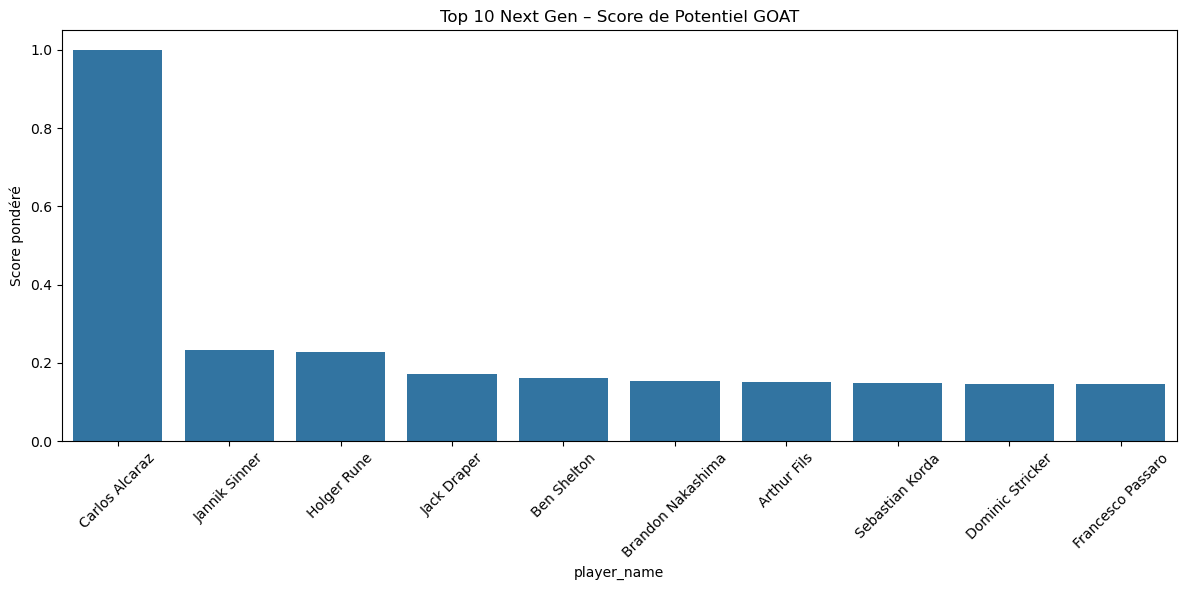

In [14]:
# TOP 10 EARLY 2024

plt.figure(figsize=(12,6))
sns.barplot(x='player_name', y='potential_score', data=df_nextgen.head(10))
plt.title("Top 10 Next Gen – Score de Potentiel GOAT")
plt.ylabel("Score pondéré")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap

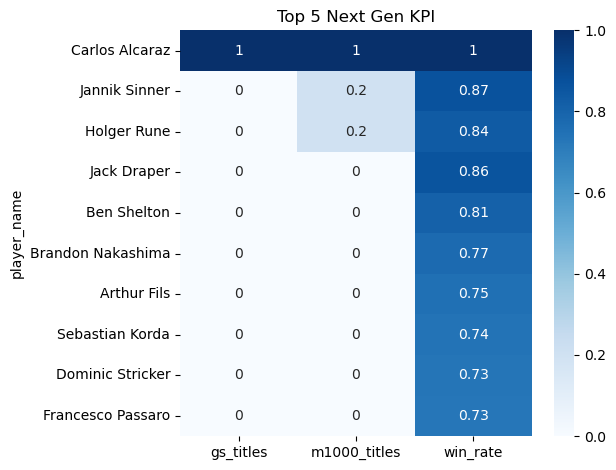

In [15]:
top10 = df_nextgen.head(10).set_index('player_name')
sns.heatmap(top10[['gs_titles', 'm1000_titles', 'win_rate']], annot=True, cmap="Blues")
plt.title("Top 5 Next Gen KPI")
plt.tight_layout()
plt.show()

# Carlos Alcaraz est actuellement le Next Gen avec la trajectoire la plus proche du modèle Djokovic, tant en précocité qu'en palmarès. Sinner suit de près, avec un profil plus progressif mais tout aussi solide.